<h3><h3>
<h1><center> Fraud Analytics using Predictive and Social Network Techniques (CS6890) </center></h1>
<h2><center> Fraud Detection Using an Autoencoders and Variational Autoencoders </center></h2>

<h3>Team members:</h3>
<center>
    <h4>
        <table>
            <tr>
                <th> Name </th>
                <th> Roll Number </th>
            </tr>
            <tr>
                <td> Kritik Agarwal </td>
                <td> CS23MTECH11009 </td>
            </tr>
            <tr>
                <td> Raghavendra Kulkarni </td>
                <td> CS23MTECH11016 </td>
            </tr>
            <tr>
                <td> Arnab Ghosh </td>
                <td> CS23MTECH11025 </td>
            </tr>
            <tr>
                <td> Shagun Sharma </td>
                <td> CS23MTECH14013 </td>
            </tr>
            <tr>
                <td> Trishita Saha </td>
                <td> CS23MTECH14016 </td>
            </tr>
        </table>
    </h4>
</center>

### Import the required packages

In [1]:
# Packages for Data handling
import numpy as np
import pandas as pd

# Packages for Data Preprocessing and Model Testing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Packages for Neural Networks
import tensorflow as tf

# Packages for Result Visualization
import matplotlib.pyplot as plt

### Load the Credit Card Dataset

In [2]:
# Load the data and display the first 5 rows
transactions = pd.read_csv('creditcard.csv')
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Preprocess the Data

In [3]:
# Check for missing values in the columns
transactions.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# Normalize the columns using a Min-Max Scaling
scaler = MinMaxScaler()
columns = list(transactions.columns)
for column in columns:
    transactions[column] = scaler.fit_transform(transactions[column].values.reshape(-1, 1))
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


### AutoEncoders

#### Training and Testing Data Preparation

In [5]:
# Split the Dataset into Training and Testing Data
X_train = transactions[transactions['Class'] == 0].drop('Class', axis = 1)
y_train = transactions[transactions['Class'] == 0].Class
X_test = transactions[transactions['Class'] == 1].drop('Class', axis = 1)
y_test = transactions[transactions['Class'] == 1].Class

#### Build the Autoencoder Model Architecture

In [6]:
# Build the autoencoder model in (30-10-5-2-5-10-30) architecture
features = X_train.shape[1]
model = tf.keras.Sequential([
  tf.keras.Input(shape = (features, )),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(5, activation = 'relu'),
  tf.keras.layers.Dense(2, activation = 'relu'),
  tf.keras.layers.Dense(5, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'relu'),
  tf.keras.layers.Dense(features, activation = 'sigmoid')
])

# Compile the model and print the summary
model.compile(optimizer='adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
 dense_3 (Dense)             (None, 5)                 15        
                                                                 
 dense_4 (Dense)             (None, 10)                60        
                                                                 
 dense_5 (Dense)             (None, 30)                330       
                                                                 
Total params: 782 (3.05 KB)
Trainable params: 782 (3.05 

#### Train the Autoencoder Model

In [7]:
# Train the Autoencoder Model on Legitimate Transactions
model.fit(X_train, X_train, epochs = 100, batch_size = 512, validation_split = 0.2)

Epoch 1/100
445/445 [==============================] - 8s 11ms/step - loss: 0.0182 - val_loss: 0.0094
Epoch 2/100
445/445 [==============================] - 4s 10ms/step - loss: 0.0036 - val_loss: 0.0086
Epoch 3/100
445/445 [==============================] - 6s 12ms/step - loss: 0.0034 - val_loss: 0.0085
Epoch 4/100
445/445 [==============================] - 3s 6ms/step - loss: 0.0034 - val_loss: 0.0084
Epoch 5/100
445/445 [==============================] - 2s 5ms/step - loss: 0.0034 - val_loss: 0.0085
Epoch 6/100
445/445 [==============================] - 3s 7ms/step - loss: 0.0034 - val_loss: 0.0085
Epoch 7/100
445/445 [==============================] - 3s 7ms/step - loss: 0.0034 - val_loss: 0.0085
Epoch 8/100
445/445 [==============================] - 3s 7ms/step - loss: 0.0034 - val_loss: 0.0085
Epoch 9/100
445/445 [==============================] - 1s 3ms/step - loss: 0.0034 - val_loss: 0.0085
Epoch 10/100
445/445 [==============================] - 1s 3ms/step - loss: 0.0034 - val

#### Use the learnt Latent Representations on a Logistic Regression model

In [8]:
# Reconstruct the Training and Testing data
X_validate = X_train[:500]
encoded_train = model.predict(X_validate)
encoded_test = model.predict(X_test)

16/16 [==============================] - 0s 2ms/step


In [9]:
train_diff = np.sum((encoded_train - X_validate)**2, axis = 1)
threshold = train_diff.mean()

In [10]:
test_diff = np.sum(((encoded_test - X_test)**2), axis = 1)
y_pred = (test_diff > threshold).astype(int)

#### Result Metrics Computation

In [11]:
# Compute and print the Accuracy, Precision, Recall and F1-Score
print('Accuracy Score:{}'.format(accuracy_score(y_test, y_pred)))
print('Precision Score:{}'.format(precision_score(y_test, y_pred)))
print('Recall Score:{}'.format(recall_score(y_test, y_pred)))
print('F1 Score:{}'.format(f1_score(y_test, y_pred)))
ae_scores = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)]

Accuracy Score:0.9410569105691057
Precision Score:1.0
Recall Score:0.9410569105691057
F1 Score:0.9696335078534032


#### Summary:

- We trained the AutoEncoder Model to learn the latent representations of the legitimate transaction features.
- Then we sampled the first 500 legitimate transactions and reconstructed them. The average reconstruction error of these 500 data points was taken as the threshold.
- The results section above summarizes the performance of the AutoEncoder model on the Testing data, i.e., the fraudulent transactions.
- With accuracy above 90%, the autoencoder model is able to distinguish between Fraudulent and Legitimate transactions on the basis of reconstruction error.

### Variational Autoencoder (VAE)

#### Training and Testing Data Preparation

In [12]:
# Split the Dataset into Training and Testing Data
X_train_vae = transactions[transactions['Class'] == 0].drop('Class', axis = 1)
y_train_vae = transactions[transactions['Class'] == 0].Class
X_test_vae = transactions[transactions['Class'] == 1].drop('Class', axis = 1)
y_test_vae = transactions[transactions['Class'] == 1].Class

#### Build the Variational Autoencoder Model Architecture

In [13]:
latent_dim = 2

# Define encoder model
encoder_inputs = tf.keras.Input(shape=(X_train_vae.shape[1],))
layer1 = tf.keras.layers.Dense(10, activation='relu')(encoder_inputs)
layer2 = tf.keras.layers.Dense(5, activation='relu')(layer1)
z_mean = tf.keras.layers.Dense(latent_dim)(layer2)
z_log_var = tf.keras.layers.Dense(latent_dim)(layer2)

In [14]:
# Reparameterization function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim))
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

z = tf.keras.layers.Lambda(sampling)([z_mean, z_log_var])

In [15]:
# Define decoder model
decoder_inputs = tf.keras.layers.Input(shape=(latent_dim,))
layer3 = tf.keras.layers.Dense(5, activation='relu')(decoder_inputs)
layer4 = tf.keras.layers.Dense(10, activation='relu')(layer3)
outputs = tf.keras.layers.Dense(X_train_vae.shape[1], activation='sigmoid')(layer4)

In [16]:
# Define VAE model
encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = tf.keras.Model(decoder_inputs, outputs, name='decoder')
outputs = decoder(encoder(encoder_inputs)[2])
model_vae = tf.keras.Model(encoder_inputs, outputs, name='vae')

In [17]:
reconstruction_loss = tf.keras.losses.mean_squared_error(encoder_inputs, outputs)
reconstruction_loss *= X_train_vae.shape[1]
kl_loss = 1 + z_log_var - tf.keras.backend.square(z)
kl_loss = tf.keras.backend.sum(kl_loss, axis = -1)
kl_loss *= -0.5
vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
model_vae.add_loss(vae_loss)

#### Train the Variational Autoencoder Model

In [18]:
model_vae.compile(optimizer='adam')
model_vae.fit(X_train_vae, X_train_vae, epochs=100, batch_size=512, validation_split = 0.2)

Epoch 1/100
445/445 [==============================] - 3s 4ms/step - loss: 0.4132 - val_loss: 0.2758
Epoch 2/100
445/445 [==============================] - 2s 4ms/step - loss: 0.1112 - val_loss: 0.2550
Epoch 3/100
445/445 [==============================] - 2s 5ms/step - loss: 0.1026 - val_loss: 0.2541
Epoch 4/100
445/445 [==============================] - 2s 5ms/step - loss: 0.1052 - val_loss: 0.2577
Epoch 5/100
445/445 [==============================] - 3s 6ms/step - loss: 0.1046 - val_loss: 0.2634
Epoch 6/100
445/445 [==============================] - 3s 7ms/step - loss: 0.1037 - val_loss: 0.2506
Epoch 7/100
445/445 [==============================] - 1s 3ms/step - loss: 0.1006 - val_loss: 0.2481
Epoch 8/100
445/445 [==============================] - 1s 3ms/step - loss: 0.0982 - val_loss: 0.2609
Epoch 9/100
445/445 [==============================] - 1s 3ms/step - loss: 0.1005 - val_loss: 0.2536
Epoch 10/100
445/445 [==============================] - 2s 3ms/step - loss: 0.1060 - val_lo

Set the average training error as threshold and reconstruct Fraudulent Transactions

#### Use the learnt Latent Representations on a Logistic Regression model

In [19]:
# Reconstruct the Training and Testing data
X_validate_vae = X_train_vae[:500]
encoded_train_vae = model.predict(X_validate_vae)
encoded_test_vae = model.predict(X_test_vae)

16/16 [==============================] - 0s 2ms/step


In [20]:
train_diff_vae = np.sum((encoded_train_vae - X_validate_vae)**2, axis = 1)
threshold_vae = train_diff_vae.mean()

In [21]:
test_diff_vae = np.sum(((encoded_test_vae - X_test_vae)**2), axis = 1)
y_pred_vae = (test_diff_vae > threshold_vae).astype(int)

#### Result Metrics Computation

In [22]:
# Compute and print the Accuracy, Precision, Recall and F1-Score
print('Accuracy Score:{}'.format(accuracy_score(y_test_vae, y_pred_vae)))
print('Precision Score:{}'.format(precision_score(y_test_vae, y_pred_vae)))
print('Recall Score:{}'.format(recall_score(y_test_vae, y_pred_vae)))
print('F1 Score:{}'.format(f1_score(y_test_vae, y_pred_vae)))
vae_scores = [accuracy_score(y_test_vae, y_pred_vae), f1_score(y_test_vae, y_pred_vae)]

Accuracy Score:0.9410569105691057
Precision Score:1.0
Recall Score:0.9410569105691057
F1 Score:0.9696335078534032


#### Summary

- We trained the Variational AutoEncoder Model to learn and model a distribution of the latent representations for all the legitimate transaction features.
- Then we sampled the first 500 legitimate transactions and reconstructed them. The average reconstruction error of these 500 data points was taken as the threshold.
- The results section above summarizes the performance of the Variational AutoEncoder model on the Testing data, i.e., the fraudulent transactions.
- With accuracy above 90%, the variational autoencoder model is able to distinguish between Fraudulent and Legitimate transactions on the basis of reconstruction error.
- Also, it is able to model the distribution of the transaction features and sample other transactions from the distribution.

### Performance Comparison of AutoEncoders and Variational AutoEncoders

- The Accuracy and F1-scores for both the models are compared in the below plot.
- Both the AutoEncoder and Variational AutoEncoder models show overall equal accuracy, precision and recall scores.

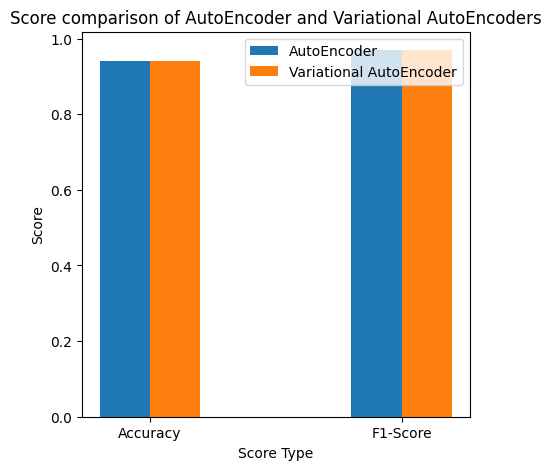

In [23]:
# Plot the joint bar plot to compare the training and testing classification costs across the models
types = ['Accuracy', 'F1-Score']
x = np.arange(len(types))
plt.figure(figsize = (5, 5))
plt.bar(x - 0.1, ae_scores, width = 0.2, label='AutoEncoder')
plt.bar(x + 0.1, vae_scores, width = 0.2, label='Variational AutoEncoder')
plt.xticks(x, types)
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.legend()
plt.title('Score comparison of AutoEncoder and Variational AutoEncoders')
plt.show()